In [1]:
#importing all csvs, cleaning data and merging into one dataset 

import os 
import pandas as pd 
bqfiles = os.listdir('data')
files_fin = []
for file in bqfiles:
    if "csv" in file:
        files_fin.append(file)

data = pd.DataFrame(columns = ['gclid', 'Traffic_source', 'Channel', 'Event_time',
                               'Page_views', 'Transactions' , 'Transaction_value', 'Session_Quality' ] )        
for file in files_fin:
    temp = pd.read_csv( os.path.join('data', file), names = ['gclid', 'Traffic_source', 'Channel', 'Event_time',
                                                             'Page_views', 'Transactions' , 'Transaction_value', 'Session_Quality' ] )
    data = pd.concat([data, temp])

data_fin = data[~data.gclid.str.contains("gclid",na=False)].fillna(0)

data_fin.Transaction_value = data_fin.Transaction_value.apply(lambda x: float(x))  #converting transaction values to float
data_fin.Session_Quality = data_fin.Session_Quality.apply(lambda x: int(x))  #converting session quality to number
data_fin.Page_views = data_fin.Page_views.apply(lambda x: int(x))
data_fin.Transactions = data_fin.Transactions.apply(lambda x: int(x))




In [18]:
# filtering dataset to gclid with transactions only for futher analysis and its correlation to Sesssion Quality
d_1 = data_fin
d_2 = data_fin[data_fin['Channel'] == 'Paid Search']
d_3 = data_fin[data_fin['Channel'] == 'Display']
d_4 = data_fin[data_fin['Channel'] == 'Remarketing']


In [14]:
df1 = d_1.groupby('Session_Quality').agg(['mean'])
session_quality = df1.index.values.tolist() 
avg_view = df1['Page_views']['mean'].tolist()
avg_rev = df1['Transaction_value']['mean'].tolist()
avg_trans = df1['Transactions']['mean'].tolist()

df2 = d_2.groupby('Session_Quality').agg(['mean'])
session_quality2 = df2.index.values.tolist() 
avg_view2 = df2['Page_views']['mean'].tolist()
avg_rev2 = df2['Transaction_value']['mean'].tolist()
avg_trans2 = df2['Transactions']['mean'].tolist()

df3 = d_3.groupby('Session_Quality').agg(['mean'])
session_quality3 = df3.index.values.tolist() 
avg_view3 = df3['Page_views']['mean'].tolist()
avg_rev3 = df3['Transaction_value']['mean'].tolist()
avg_trans3 = df3['Transactions']['mean'].tolist()

df4 = d_4.groupby('Session_Quality').agg(['mean'])
session_quality4 = df4.index.values.tolist() 
avg_view4 = df4['Page_views']['mean'].tolist()
avg_rev4 = df4['Transaction_value']['mean'].tolist()
avg_trans4 = df4['Transactions']['mean'].tolist()


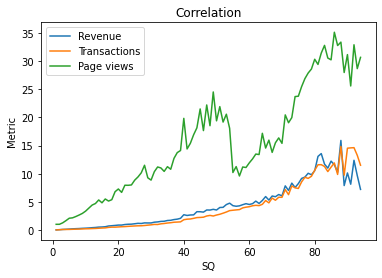

In [15]:
# importing the required module 

import matplotlib.pyplot as plt 
# x axis values 
x1 = session_quality
y1 = avg_rev

x2 = session_quality
y2 = avg_trans

x3 = session_quality
y3 = avg_view

# plotting the points 
plt.plot(x1, y1, label = "Revenue") 
plt.plot(x2,y2, label = "Transactions")
plt.plot(x3,y3, label = "Page views")

# naming the x axis 
plt.xlabel('SQ') 
# naming the y axis 
plt.ylabel('Metric') 

# giving a title to my graph 
plt.title('Correlation') 
plt.legend()

# function to show the plot 
plt.show() 

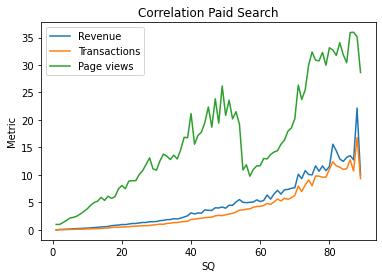

In [11]:
# x axis values 
x1 = session_quality2
y1 = avg_rev2

x2 = session_quality2
y2 = avg_trans2

x3 = session_quality2
y3 = avg_view2

# plotting the points 
plt.plot(x1, y1, label = "Revenue") 
plt.plot(x2,y2, label = "Transactions")
plt.plot(x3,y3, label = "Page views")

# naming the x axis 
plt.xlabel('SQ') 
# naming the y axis 
plt.ylabel('Metric') 

# giving a title to my graph 
plt.title('Correlation Paid Search') 
plt.legend()

# function to show the plot 
plt.show() 

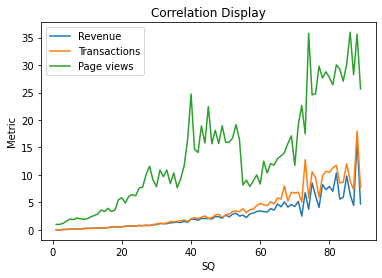

In [10]:
# x axis values 
x1 = session_quality3
y1 = avg_rev3

x2 = session_quality3
y2 = avg_trans3

x3 = session_quality3
y3 = avg_view3

# plotting the points 
plt.plot(x1, y1, label = "Revenue") 
plt.plot(x2,y2, label = "Transactions")
plt.plot(x3,y3, label = "Page views")

# naming the x axis 
plt.xlabel('SQ') 
# naming the y axis 
plt.ylabel('Metric') 

# giving a title to my graph 
plt.title('Correlation Display') 
plt.legend()

# function to show the plot 
plt.show() 



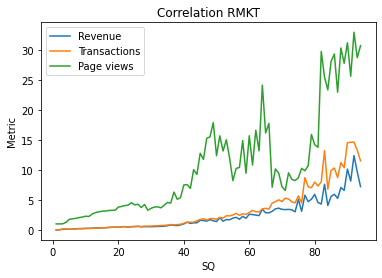

In [9]:
# x axis values 
x1 = session_quality4
y1 = avg_rev4

x2 = session_quality4
y2 = avg_trans4

x3 = session_quality4
y3 = avg_view4

# plotting the points 
plt.plot(x1, y1, label = "Revenue") 
plt.plot(x2,y2, label = "Transactions")
plt.plot(x3,y3, label = "Page views")

# naming the x axis 
plt.xlabel('SQ') 
# naming the y axis 
plt.ylabel('Metric') 

# giving a title to my graph 
plt.title('Correlation RMKT') 
plt.legend()

# function to show the plot 
plt.show() 



In [19]:
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


page_view = data_fin['Page_views'].tolist()
s_qual = data_fin['Session_Quality'].tolist()
trans_v = data_fin['Transaction_value'].tolist()
trans = data_fin['Transactions'].tolist()

metrics = []
metrics.append(trans_v)
metrics.append(trans)
metrics.append(page_view)

metrics_name = ["Transaction value", "Transactions", "Page views"]
corr_l = []

for metric in metrics:
    k_corr = kendalltau(metric,s_qual)
    s_corr = spearmanr(metric,s_qual)
    #print(f"Pearson's correlation of {metrics_name[metrics.index(metric)]} and Session Quality is {round(p_corr[0],2)}")
    #print(f"Spearman's correlation of {metrics_name[metrics.index(metric)]} and Session Quality is {round(s_corr[0],2)}" + '\n')
    corr_l.append(round(k_corr[0],2))
    corr_l.append(round(s_corr[0],2))  
        
def divide_chunks(any_list,n):
    for i in range (0, len(any_list), n):
        yield any_list[i:i + n]

body = list(divide_chunks(corr_l,2))
    
total_table = pd.DataFrame(np.array(body),
        columns=['Kendall correlation','Spearman Correlation'], index=metrics_name)
display(total_table)

,Kendall correlation,Spearman Correlation
Transaction value,0.34,0.42
Transactions,0.36,0.43
Page views,0.58,0.70


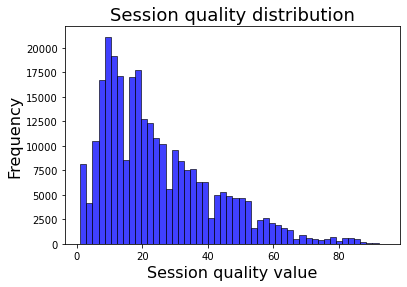

In [93]:
import seaborn as sns

hplot = sns.histplot(d_1['Session_Quality'], kde=False, color='blue', bins=50)
plt.title('Session quality distribution', fontsize=18)
plt.xlabel('Session quality value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plot_file_name="gapminder_life_expectancy_histogram.jpg"
# save as jpeg
hplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)



[[1.         0.42940452]
 [0.42940452 1.        ]]


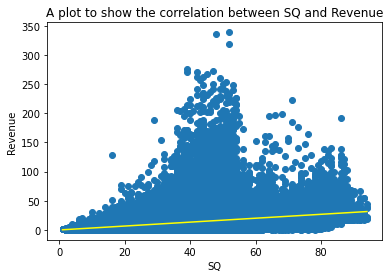

In [94]:
x = d_1['Session_Quality']
y = d_1['Page_views']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('A plot to show the correlation between SQ and Revenue')
plt.xlabel('SQ')
plt.ylabel('Revenue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

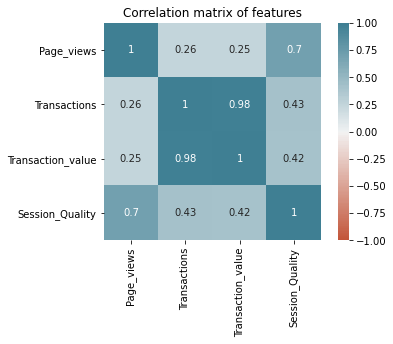

In [99]:
import seaborn as sns 

sns.heatmap(data_fin.corr(method='spearman'), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot = True)
plt.title("Correlation matrix of features")
plt.show



In [40]:
quantiles = data_fin[data_fin['Transaction_value'] > 0].Transaction_value.quantile([0.25,0.5,0.75]).tolist()
sq_quantiles = data_fin.Session_Quality.quantile([0.25,0.5,0.75]).tolist()

def quantile_thres(x):
    if x < quantiles[0]:
        return "a. <25%"
    elif quantiles[0] <= x < quantiles[1]:
        return "b. 25% - 50%"
    elif quantiles[1] <= x < quantiles[2]:
        return "c. 50% - 75%"
    elif x >= quantiles[2]:
        return "d. > 75%"
    

data_fin['Trans. value threshold'] = data_fin.Transaction_value.apply(quantile_thres)

def sq_thres(x):
    if x < 20:
        return "a. low SQ"
    elif 20 <= x < 60:
        return "b. moderate SQ"
    elif x >= 60:
        return "c. high SQ"
data_fin['SQ threshold'] = data_fin.Session_Quality.apply(sq_thres)    

pv = data_fin[data_fin['Transaction_value'] > 0].pivot_table(values='gclid', columns='SQ threshold', index='Trans. value threshold' , aggfunc='count',
                         margins=True)

pvSQ = pv.copy()
pvSQ['a. low SQ'] = pv['a. low SQ'].apply(lambda x: round(x / pv['a. low SQ'][4] * 100,2))
pvSQ['b. moderate SQ'] = pv['b. moderate SQ'].apply(lambda x: round(x / pv['b. moderate SQ'][4] *100,2))
pvSQ['c. high SQ'] = pv['c. high SQ'].apply(lambda x: round(x / pv['c. high SQ'][4]*100,2))
pvSQ.iloc[:,0:3]

SQ threshold,a. low SQ,b. moderate SQ,c. high SQ
Trans. value threshold,,,
a. <25%,28.32,22.44,10.84
b. 25% - 50%,29.21,22.06,12.88
c. 50% - 75%,25.26,25.14,21.62
d. > 75%,17.22,30.36,54.66
All,100.00,100.00,100.00


In [100]:
pv2 = data_fin[data_fin['Transaction_value'] > 0].pivot_table(values='gclid', columns='Trans. value threshold', index='SQ threshold' , aggfunc='count',
                         margins=True)
pvTV = pv2.copy()
pvTV['a. <25%'] = pv2['a. <25%'].apply(lambda x: round(x / pv2['a. <25%'][3] * 100,2))
pvTV['b. 25% - 50%'] = pv2['b. 25% - 50%'].apply(lambda x: round(x / pv2['b. 25% - 50%'][3] *100,2))
pvTV['c. 50% - 75%'] = pv2['c. 50% - 75%'].apply(lambda x: round(x / pv2['c. 50% - 75%'][3]*100,2))
pvTV['d. > 75%'] = pv2['d. > 75%'].apply(lambda x: round(x / pv2['d. > 75%'][3]*100,2))
pvTV['All'] = pv2['All'].apply(lambda x: round(x / pv2['All'][3]*100,2))

pvTV.iloc[:,0:5]




Trans. value threshold,a. <25%,b. 25% - 50%,c. 50% - 75%,d. > 75%,All
SQ threshold,,,,,
a. low SQ,55.19,56.16,48.69,33.15,48.28
b. moderate SQ,42.91,41.60,47.55,57.35,47.36
c. high SQ,1.91,2.23,3.76,9.50,4.36
All,100.00,100.00,100.00,100.00,100.00
